In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sms=pd.read_csv('/content/sample_data/spam.csv',encoding='windows-1250')

In [ ]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
sms.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [ ]:
sms.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
sms.head(1)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
sms['target']=ln.fit_transform(sms['target'])

In [ ]:
sms.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.duplicated().sum()

403

In [ ]:
sms.drop_duplicates()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ě_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
sms=sms.drop_duplicates(keep='first')

In [ ]:
sms.shape


(5169, 2)

In [ ]:
sms.duplicated().sum()

0

In [ ]:
sms['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

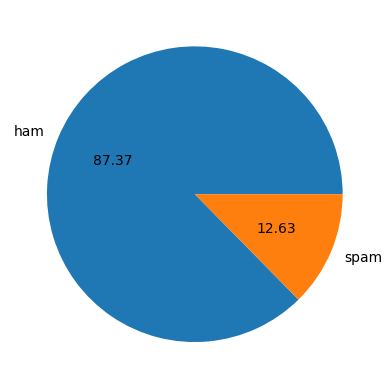

In [ ]:
plt.pie(sms['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
sms['char']=sms['text'].apply(len)

In [ ]:
sms.head()

,target,text,char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sms['words']=sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
sms.head()

,target,text,char,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
sms['sentence']=sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
sms.head()

,target,text,char,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
sms[sms['target']==0].describe()

,target,char,words,sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
sms[sms['target']==1].describe()

,target,char,words,sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='char', ylabel='Count'>

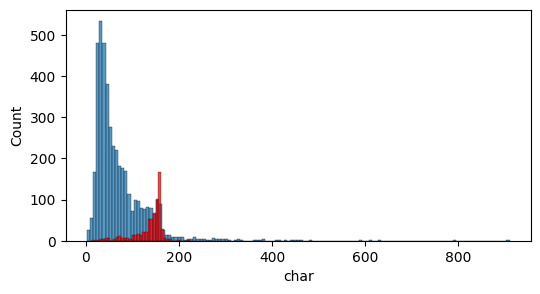

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(sms[sms['target']==0]['char'])
sns.histplot(sms[sms['target']==1]['char'],color='red')

<Axes: xlabel='words', ylabel='Count'>

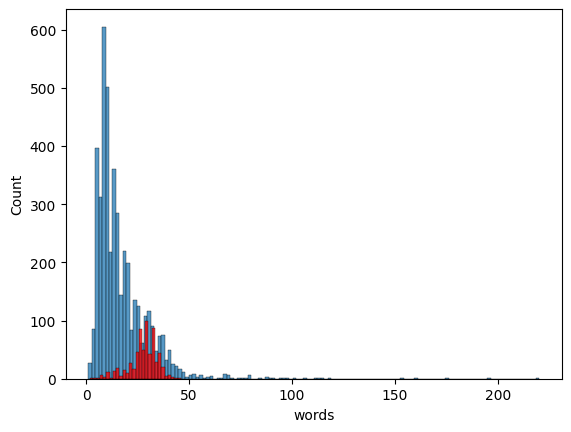

In [ ]:
sns.histplot(sms[sms['target']==0]['words'])
sns.histplot(sms[sms['target']==1]['words'],color='red')

<Axes: xlabel='sentence', ylabel='Count'>

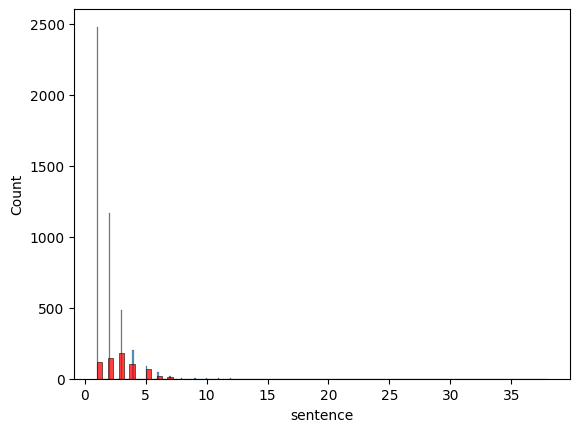

In [ ]:
sns.histplot(sms[sms['target']==0]['sentence'])
sns.histplot(sms[sms['target']==1]['sentence'],color='red')

**data preprocessing of text data**

  Lower case

  Tokenization

  Removing special characters

  Removing stop words and punctuation

  Stemming

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
import string

In [ ]:
def preprocess(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  rm_sp=[]
  for i in text:
    if i.isalnum:
      rm_sp.append(i)
  text=rm_sp[:]
  st=[]
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      st.append(i)
  text=st[:]
  stem=[]
  for i in text:
    stem.append(ps.stem(i))
  text=stem[:]
  return ' '.join(text)



In [ ]:
preprocess('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...'

In [ ]:
sms['text']=sms['text'].apply(preprocess)

In [ ]:
sms.head()

,target,text,char,words,sentence
0,0,go jurong point crazi .. avail bugi n great wo...,111,24,2
1,0,ok lar ... joke wif u oni ...,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor ... u c alreadi say ...,49,13,1
4,0,nah n't think goe usf live around though,61,15,1


In [ ]:
!pip install Wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
w_spam=wc.generate(sms[sms['target']==1]['text'].str.cat(sep=' '))

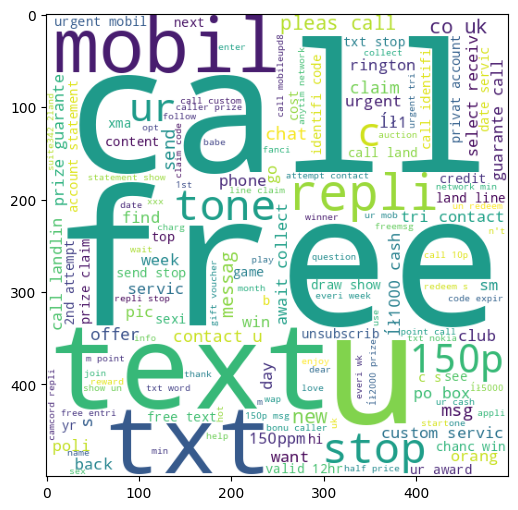

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(w_spam)

In [ ]:
w_ham=wc.generate(sms[sms['target']==0]['text'].str.cat(sep=' '))

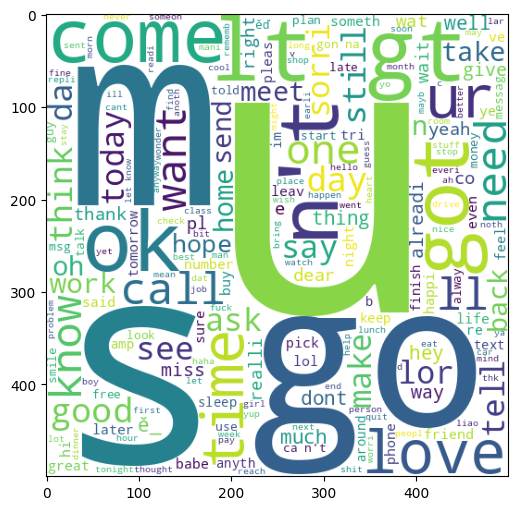

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(w_spam)

**Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf=TfidfVectorizer()

In [ ]:
x=tf.fit_transform(sms['text']).toarray()

In [ ]:
x.shape

(5169, 7403)

In [ ]:
y=sms['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8849129593810445
[[796 100]
 [ 19 119]]
0.54337899543379


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[896   0]
 [ 38 100]]
1.0


In [ ]:
mnb.fit(x_train,y_train)
mnb.predict(tf.transform([preprocess('congratulations you win the 10 lakh amount in lottery')]))

array([0])

In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,x_train,y_train,x_tesx_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():

#     current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))